In [4]:
import re
import pandas as pd

In [5]:
import re
import pandas as pd

def parse_whatsapp_chat(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    chat_data = []
    date_time_pattern = r'\[\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2} [APap][mM]\]'
    message_pattern = re.compile(rf'({date_time_pattern}) (.*?): (.*)')

    for line in lines:
        if line.strip():  # Check for empty lines
            match = message_pattern.match(line)
            if match:
                date_time, sender, message = match.groups()
                # Remove the brackets around date_time
                date_time = date_time[1:-1]
                chat_data.append([date_time, sender, message])
            else:
                # Append message to the previous entry if it's a multi-line message
                if chat_data:  # Ensure there's at least one previous message
                    chat_data[-1][-1] += f'\n{line.strip()}'

    # Convert to DataFrame
    df = pd.DataFrame(chat_data, columns=['DateTime', 'User', 'Message'])
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%y, %I:%M:%S %p')

    return df

# Example usage
file_path = r'C:\Users\Nazbeen-Ai\Documents\My Projects\Machine Learning Projects\Whatsapp Automation NLP & LLM\_chat.txt'
chat_df = parse_whatsapp_chat(file_path)
print(chat_df.head())


             DateTime                 User  \
0 2024-05-13 13:22:33           My-Wife 💞💕   
1 2024-05-13 13:22:33  NAZBEEN PHOTOGRAPHY   
2 2024-05-13 13:22:50  NAZBEEN PHOTOGRAPHY   
3 2024-05-13 13:23:27           My-Wife 💞💕   
4 2024-05-13 13:23:50           My-Wife 💞💕   

                                             Message  
0  ‎Messages and calls are end-to-end encrypted. ...  
1                                             Babyna  
2  Namaida whatsapp dina ga iphone komai ya goge ...  
3                                              Uhmmm  
4  Ban gane komai yagoge bah\n‎[5/13/24, 1:24:29 ...  


In [6]:
users = []
messages = []
for message in chat_df['Message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

chat_df['user'] = users
chat_df['message'] = messages
chat_df.drop(columns=['Message'], inplace=True)
chat_df.drop(columns=['user'], inplace=True)

Seperate the Message and Usernames


#### Breaking the Date Column into Different columns

In [7]:
# Extract multiple columns from the Date Column

chat_df['only_date'] = chat_df['DateTime'].dt.date
chat_df['year'] = chat_df['DateTime'].dt.year
chat_df['month_num'] = chat_df['DateTime'].dt.month
chat_df['month'] = chat_df['DateTime'].dt.month_name()
chat_df['day'] = chat_df['DateTime'].dt.day
chat_df['day_name'] = chat_df['DateTime'].dt.day_name()
chat_df['hour'] = chat_df['DateTime'].dt.hour
chat_df['minute'] = chat_df['DateTime'].dt.minute

In [8]:
#add period column that shows data capture between which 24 hour format

period = []
for hour in chat_df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

chat_df['period'] = period
chat_df.tail(20)

,DateTime,User,message,only_date,year,month_num,month,day,day_name,hour,minute,period
15775,2024-07-10 09:27:47,NAZBEEN PHOTOGRAPHY,Na am matar honey,2024-07-10,2024,7,July,10,Wednesday,9,27,9-10
15776,2024-07-10 09:27:49,My-Wife 💞💕,Shi dan naka,2024-07-10,2024,7,July,10,Wednesday,9,27,9-10
15777,2024-07-10 09:28:06,NAZBEEN PHOTOGRAPHY,Awo nafison honey dashi wallah,2024-07-10,2024,7,July,10,Wednesday,9,28,9-10
15778,2024-07-10 09:28:46,My-Wife 💞💕,Kai honeeeyyy,2024-07-10,2024,7,July,10,Wednesday,9,28,9-10
15779,2024-07-10 09:29:09,My-Wife 💞💕,Dan naka kuma,2024-07-10,2024,7,July,10,Wednesday,9,29,9-10
15780,2024-07-10 09:29:19,My-Wife 💞💕,Kassan koh ya biyo honeyyy,2024-07-10,2024,7,July,10,Wednesday,9,29,9-10
15781,2024-07-10 09:29:25,NAZBEEN PHOTOGRAPHY,Awoo ina ruwana dashi kawai yazo yana wahalrmi...,2024-07-10,2024,7,July,10,Wednesday,9,29,9-10
15782,2024-07-10 09:29:55,NAZBEEN PHOTOGRAPHY,Kije ki dafa honey na 🥰,2024-07-10,2024,7,July,10,Wednesday,9,29,9-10
15783,2024-07-10 09:30:02,NAZBEEN PHOTOGRAPHY,Sai kindawo ko,2024-07-10,2024,7,July,10,Wednesday,9,30,9-10
15784,2024-07-10 09:30:08,My-Wife 💞💕,Ok honeeeyyy,2024-07-10,2024,7,July,10,Wednesday,9,30,9-10


Data Analysis: Display Basic Statistics for Data Analysis

In [9]:
# Total Messages
chat_df.shape[0]

15795

In [10]:
# get the total number of words

words = []
for message in chat_df['message']:
    words.extend(message.split())

print(len(words))

74359


In [11]:
# Get the Number of Media Messages
chat_df[chat_df['message'] == 'audio omitted'].shape[0]

0

In [12]:
#Number of Links Shared
from urlextract import URLExtract

extract = URLExtract()

links = []
for message in chat_df['message']:
    links.extend(extract.find_urls(message))

print(len(links))

1


Data Analysis: Find the Busiest Users in Group

c:\Users\Nazbeen-Ai\anaconda3\envs\envwh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128158 (\N{REVOLVING HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Nazbeen-Ai\anaconda3\envs\envwh\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


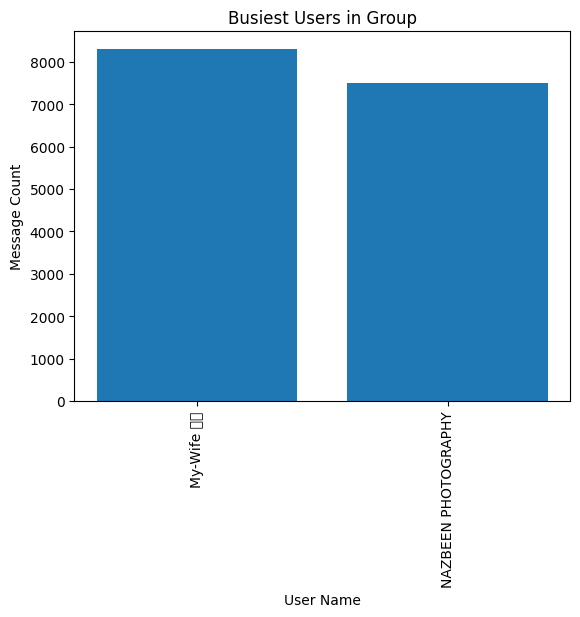

In [13]:
import matplotlib.pyplot as plt

x = chat_df['User'].value_counts().head()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)

plt.xticks(rotation='vertical')

plt.title('Busiest Users in Group')

plt.xlabel('User Name')

plt.ylabel('Message Count')

plt.show()

Along with displaying the bar graph, we will also display the percentage of chats each user has done. To find the percentage, you only need to divide the count of each user by the total number of messages and multiply by 100. After that, we round off the value with 2 decimal places and convert it to a dataframe by renaming column names.

In [14]:
new_df = round(((chat_df['User'].value_counts() / chat_df.shape[0])) * 100,2).reset_index().rename(
    columns={'index':'name', 'user':'percentage'}
)
new_df

,User,count
0,My-Wife 💞💕,52.57
1,NAZBEEN PHOTOGRAPHY,47.43


 Display TOp Words in a Chat

In [15]:
df = chat_df

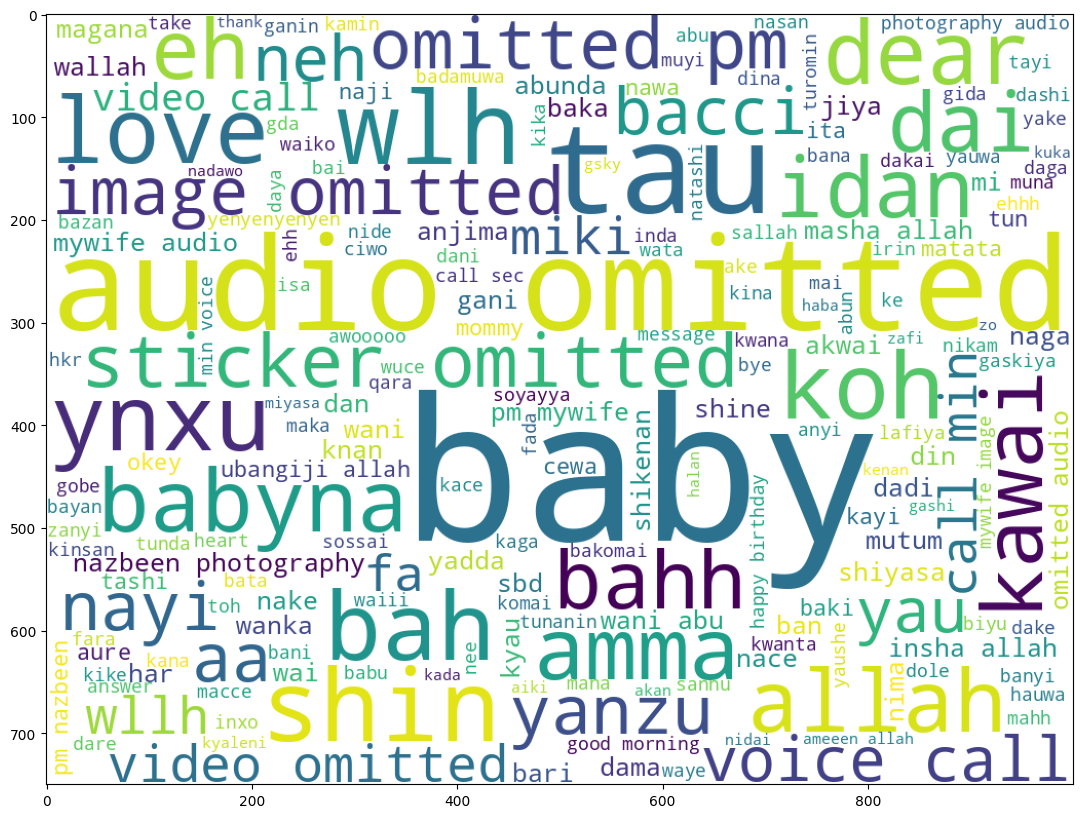

In [16]:
import string

stop_word = r'C:\Users\Nazbeen-Ai\Documents\My Projects\Machine Learning Projects\Whatsapp Automation NLP & LLM\stop_words.txt'

def remove_stop_words(message):
  f = open(stop_word, 'r')
  stop_words = f.read()
  y = []
  for word in message.lower().split():
      if word not in stop_words:
          y.append(word)
  return " ".join(y)

def remove_punctuation(message):
  x = re.sub('[%s]'% re.escape(string.punctuation), '', message)
  return x

#Data Cleaning
temp = df[df['User'] != 'group_notification'] #remove group notification
temp = temp[temp['message'] != '<Media omitted>\n'] #remove media message
temp['message'] = temp['message'].apply(remove_stop_words) #remove stopwords
temp['message'] = temp['message'].apply(remove_punctuation) #remove punctuations

#Draw the wordCloud
from wordcloud import WordCloud
plt.figure(figsize=(20, 10))
wc = WordCloud(width=1000,height=750,min_font_size=10,background_color='white')
cloud = wc.generate(temp['message'].str.cat(sep=" "))
plt.imshow(cloud)

In [17]:
temp = df[df['User'] != 'group_notification'] #remove group notification
temp = temp[temp['message'] != '<Media omitted>\n']  #remove media msg
temp['message'] = temp['message'].apply(remove_stop_words) #remove stop words
temp['message'] = temp['message'].apply(remove_punctuation) #remove punctuations

words = []
for message in temp['message']:
  words.extend(message.split())

#apply counter
from collections import Counter
most_common_df = pd.DataFrame(Counter(words).most_common(20))
most_common_df

,0,1
0,omitted,1197
1,allah,1017
2,baby,788
3,tau,676
4,‎audio,615
5,you,531
6,😂,451
7,wlh,403
8,shin,368
9,my,367


In [18]:
# emoji Analysis
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,2914
1,🫂,869
2,🙄,835
3,🥺,753
4,😭,532
...,...,...
80,🐉,1
81,✔,1
82,👸,1
83,🥘,1


Time based Analysis

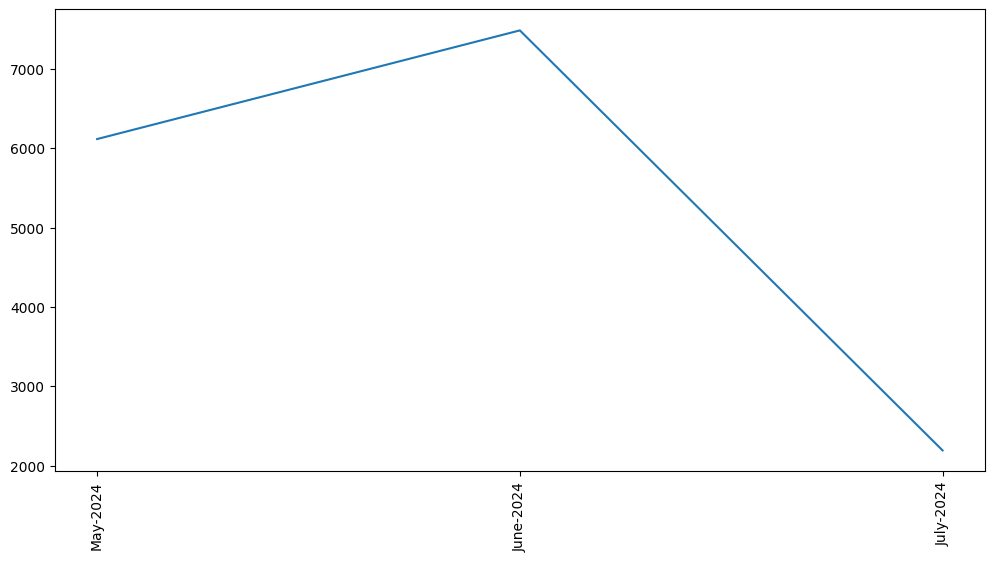

In [19]:
# Monthly Cats Timeline

timeline = df.groupby(['year', 'month_num','month']).count()['message'].reset_index()
month_timeline = []

for i in range(timeline.shape[0]):
    month_timeline.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = month_timeline

# draw plot

plt.figure(figsize=(12, 6))
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

Daily Timeline

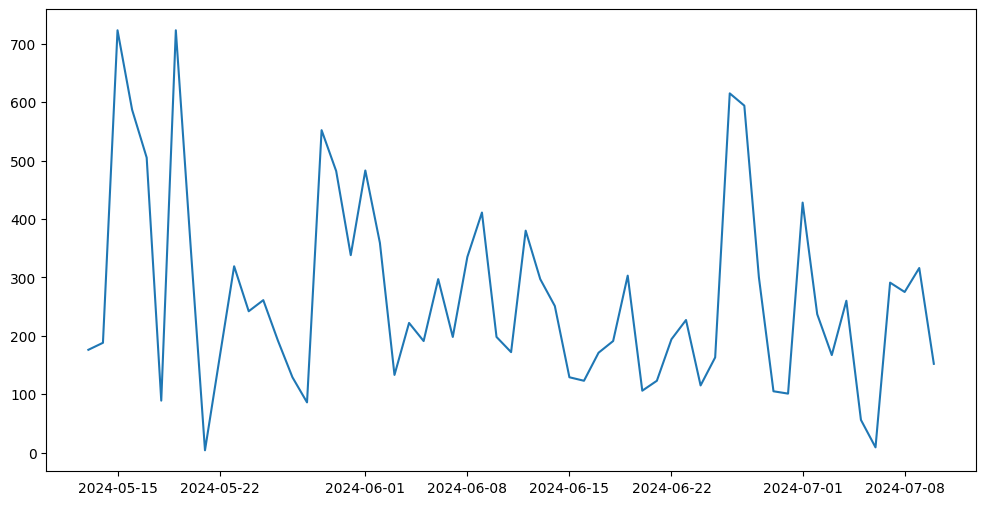

In [20]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])
plt.show()

Day-based Activity Map

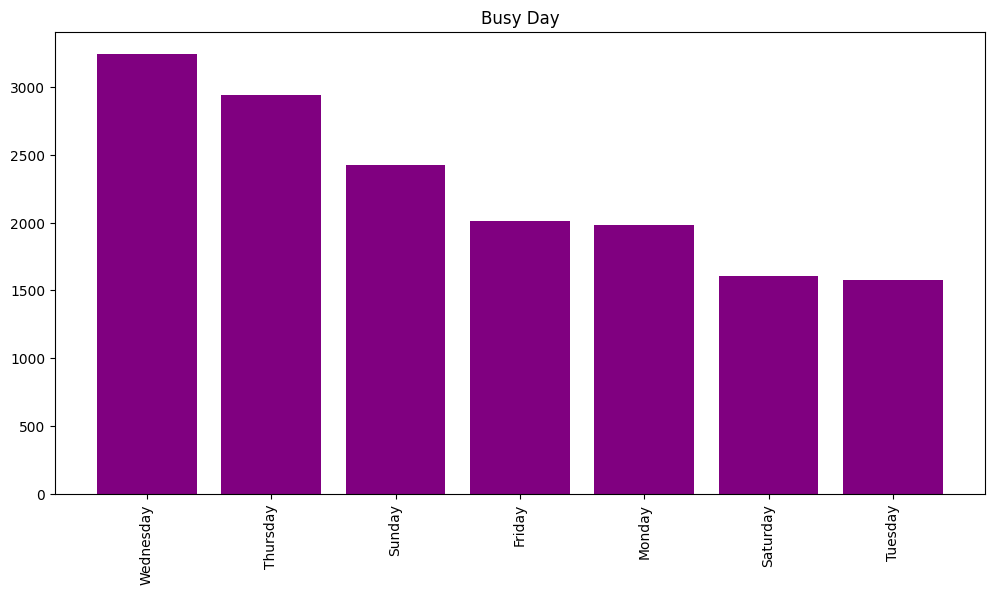

In [21]:
busy_day = df['day_name'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(busy_day.index, busy_day.values, color='purple')
plt.title("Busy Day")
plt.xticks(rotation='vertical')
plt.show()

Monthly Activity Map


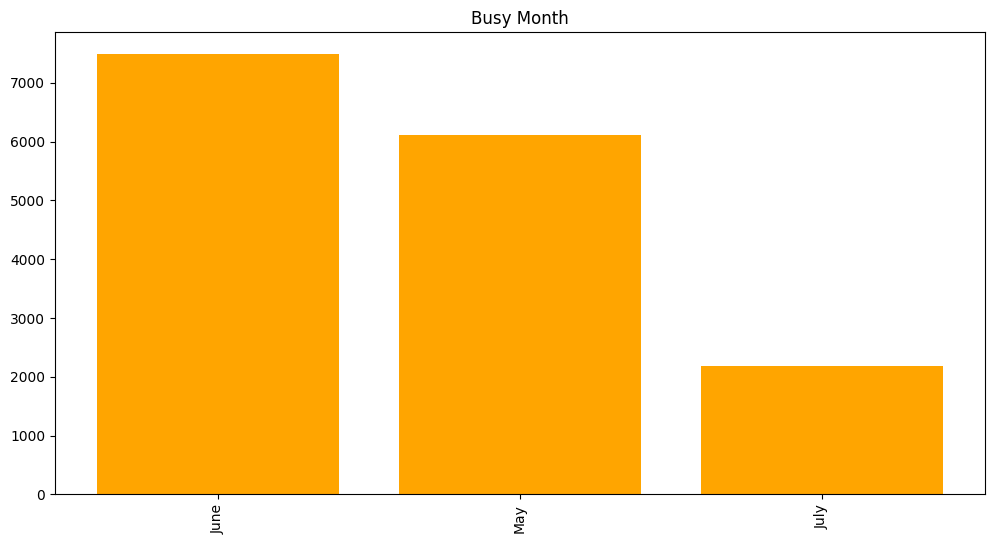

In [22]:
busy_month = df['month'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(busy_month.index, busy_month.values, color='orange')
plt.title("Busy Month")
plt.xticks(rotation='vertical')
plt.show()

Which Time User Remains Active?


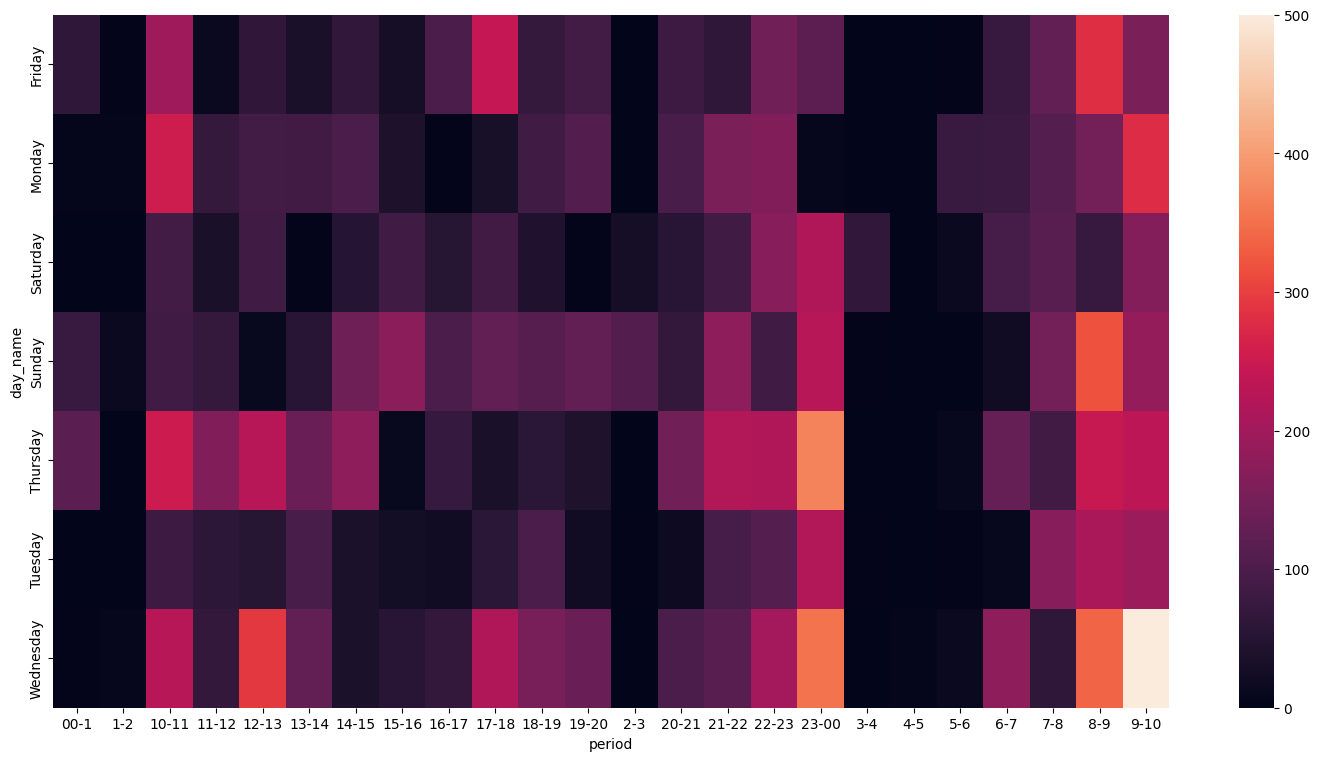

In [23]:
import seaborn as sns
plt.figure(figsize=(18, 9))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', 
            aggfunc='count').fillna(0))
plt.yticks(rotation='vertical')
plt.show()